# Wild type plotting 

Making plots with and trialling ARIMA on wild-type data

In [1]:
import os
import datetime
import pickle
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import plotly.graph_objects as go

import keras
import tensorflow as tf

from keras.preprocessing.sequence import TimeseriesGenerator


Don't have these datasets on the github but can upload next week if needed

In [8]:
files = ['df_wildtype_bm_1.pkl','df_wildtype_bm_2.pkl']
for file in files:
    with open(file, "rb") as f:
        df = pickle.load(f)
    # df.dropna(axis=1, how="all")

In [9]:
print(df.shape)
df.dropna(axis=0, how='all', inplace=True)
print(df.shape)

(550, 16687)
(550, 16687)


Didn't have much available information on the amino acids in the dataset, also lacking in prior knowledge so just searched for features containing 'ine'.

In [12]:
cols = df.columns
amino_acids = [x for x in cols if "ine" in x]
print(amino_acids)


['3-Methyl-Adenines[c]', '4-Hydroxysphing-8-enine-20-1-Ceramides[c]', '4-Hydroxysphing-8-enine-22-0-Ceramides[c]', '4-Hydroxysphing-8-enine-26-0-Ceramides[c]', '6-Hydroxy-Purine-Nucleotides[c]', '7-Deazapurines[c]', 'All-Biopterines[c]', 'Alpha-pinene[c]', 'D-Mannosamines[c]', 'DL-ethionine[c]', 'Delta-Selinenes[c]', 'Hexosamines[c]', 'Imidazolidines[c]', 'Jasmonoyl-Glutamines[c]', 'Jasmonoyl-Isoleucines[c]', 'Jasmonoyl-Leucines[c]', 'Jasmonoyl-Phenylalanines[c]', 'Jasmonoyl-Valines[c]', 'L-Methionine-sulfoxides[c]', 'L-Methionine-sulfoxides[p]', 'N-acetyl-D-galactosamine[c]', 'N-acetyl-D-glucosamine[c]', 'N-acetyl-D-glucosamine[p]', 'N-acetyl-D-hexosamines[c]', 'N-acetyl-D-mannosamine[c]', 'N-acetyl-D-mannosamine[p]', 'N-acetyl-a-D-hexosamine-1-phosphates[c]', 'N-acetyl-alpha-D-hexosamines[c]', 'N-acetyl-beta-D-hexosamines[c]', 'N-sulfo-D-glucosamine[c]', 'N3-O-disulfo-D-glucosamine[c]', 'N6-O-disulfo-D-glucosamine[c]', 'Phenothiazines[c]', 'Phosphoserines[c]', 'Serines[c]', 'Sesquisa

In [20]:
amino = []
for col in amino_acids:
    if df[col].notna().any():
        amino.append(col)
print(amino)

['3-Methyl-Adenines[c]', '4-Hydroxysphing-8-enine-20-1-Ceramides[c]', '4-Hydroxysphing-8-enine-22-0-Ceramides[c]', '4-Hydroxysphing-8-enine-26-0-Ceramides[c]', '6-Hydroxy-Purine-Nucleotides[c]', '7-Deazapurines[c]', 'All-Biopterines[c]', 'Alpha-pinene[c]', 'D-Mannosamines[c]', 'DL-ethionine[c]', 'Delta-Selinenes[c]', 'Hexosamines[c]', 'Imidazolidines[c]', 'Jasmonoyl-Glutamines[c]', 'Jasmonoyl-Isoleucines[c]', 'Jasmonoyl-Leucines[c]', 'Jasmonoyl-Phenylalanines[c]', 'Jasmonoyl-Valines[c]', 'L-Methionine-sulfoxides[c]', 'L-Methionine-sulfoxides[p]', 'N-acetyl-D-galactosamine[c]', 'N-acetyl-D-glucosamine[c]', 'N-acetyl-D-glucosamine[p]', 'N-acetyl-D-hexosamines[c]', 'N-acetyl-D-mannosamine[c]', 'N-acetyl-D-mannosamine[p]', 'N-acetyl-a-D-hexosamine-1-phosphates[c]', 'N-acetyl-alpha-D-hexosamines[c]', 'N-acetyl-beta-D-hexosamines[c]', 'N-sulfo-D-glucosamine[c]', 'N3-O-disulfo-D-glucosamine[c]', 'N6-O-disulfo-D-glucosamine[c]', 'Phenothiazines[c]', 'Phosphoserines[c]', 'Serines[c]', 'Sesquisa

seemed that most if not all of these were empty

In [39]:
import math
import math
# eth = df['L-Methionine-sulfoxides[p]']

for am in amino:
    eth = df[am]
    for row in eth:
        if isinstance(row, list):
            # if row[0] == 0:
            #     pass
            # else:
            print("Value is a list:", row)
        elif isinstance(row, float):
            if math.isnan(row):
                pass
                # print("Value is NaN")
            else:
                print("Value is a float:", row)
        else:
            print("Value is neither a list nor a float:", row)
        # Your code here
        # print(row)

Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a list: [0]
Value is a li

Found out that above were in fact not the amino acids to be looking for, and that glutamine was stored as 'GLT[c]', so plotted this.

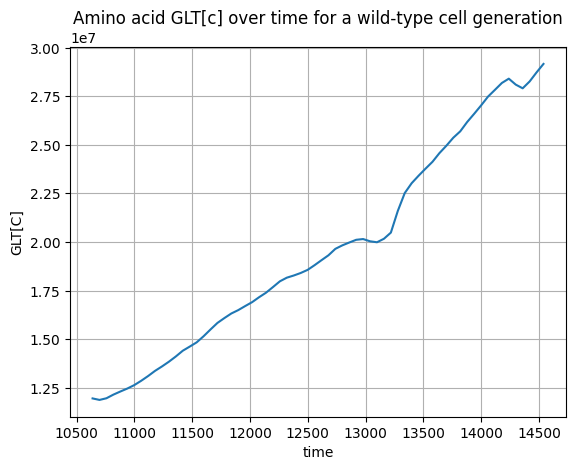

In [50]:
glt = df['GLT[c]'].iloc[0]
tim = df['time'].iloc[0]

# print(arg)

plt.plot(tim, glt)
plt.xlabel("time")
plt.ylabel("GLT[C]")
plt.title("Amino acid GLT[c] over time for a wild-type cell generation")
plt.grid(True)
plt.savefig("glutamine.pdf", format='pdf', bbox_inches='tight')

same for 'ARG[C]' - arginine

[179266 147402 141396 144167 144731 144211 146086 154281 167080 181307
 194950 199638 204851 204936 205062 199959 196921 198747 197197 195326
 195187 195407 192687 189699 196828 197825 198608 205302 201654 195372
 189392 188340 187619 187965 188086 186413 176492 170323 165674 155110
 146199 147987 157193 161082 209496 217538 212181 214844 230752 248374
 255235 250248 257275 261136 273855 272674 272194 274324 276012 272269
 271757 283686 290610 293822 292576 290403]


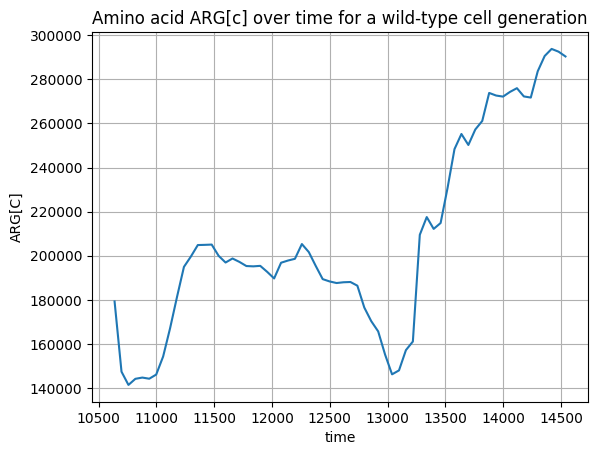

In [49]:
arg = df['ARG[c]'].iloc[0]
tim = df['time'].iloc[0]

print(arg)

plt.plot(tim, arg)
plt.xlabel("time")
plt.ylabel("ARG[C]")
plt.title("Amino acid ARG[c] over time for a wild-type cell generation")
plt.grid(True)
plt.savefig("arginine.pdf", format='pdf', bbox_inches='tight')

Moved on to plotting statistics such as distribution of division times

In [52]:
wdiffs = []

for _,row in df.iterrows():
    try:
        wdiff = (row['time'][-1]-row['time'][0])
        wdiffs.append(wdiff)
    except:
        pass

wdiffs = [x for x in wdiffs if x <=10000]

plt.hist(wdiffs, bins=40, label='wild-type')
plt.xlabel('division time /s')
plt.ylabel("frequency")
plt.title("Histogram of division time for wild-type cells")
plt.savefig("wdivtimehist.pdf", format='pdf', bbox_inches='tight')

plt.clf()

<Figure size 640x480 with 0 Axes>

ARIMA model trained for each row in the dataset

In [51]:
results = {}
timeSeries = df[['cellMass', 'time']]
timeSeries = timeSeries.iloc[:-2]

maeList = []
mseList = []
mapeList = []
i = 0
for _,row in timeSeries.iterrows():
    i +=1 
    try:
        d = row['cellMass']
        t = row['time']
        train_size = int(0.5*len(d))
        train_data = d[:train_size]
        test_data = d[train_size:]

        model = auto_arima(train_data, seasonal = False, trace=True)
        forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
        results[f'Time series {_+1}'] = model

        mae = mean_absolute_error(test_data, forecast)
        mse = mean_squared_error(test_data, forecast)
        mape = mean_absolute_percentage_error(test_data,forecast)

        maeList.append(mae)
        mseList.append(mse)
        mapeList.append(mape)
    except:
        pass
    # if i>=10:
    #     break

metricsDict = {"Mean absolute error":maeList, "Mean squared error":mseList, "Mean absolute percentage error":mapeList}
metricsFrame = pd.DataFrame(metricsDict)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=61.765, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=55.360, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=57.155, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=56.990, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=58.579, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.268 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=46.771, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=48.546, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=48.471, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=47.584, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=49.420, Time=0.28 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.472 second

distribution of metrics:


In [89]:
metricsFrame.describe()

,Mean absolute error,Mean squared error,Mean absolute percentage error
count,533.000000,533.000000,533.000000
mean,28.778600,2267.452308,0.014994
std,23.321210,3830.170725,0.012114
min,1.512028,2.704717,0.000876
25%,12.032657,298.281638,0.006242
50%,23.359924,856.769964,0.012233
75%,39.235056,2653.273905,0.020732
max,143.600739,29179.326262,0.070251


In [85]:
mean = timeSeries.mean()
std = timeSeries.std()

timeSeriesNorm = (timeSeries - mean)/std

TypeError: operands could not be broadcast together with shapes (66,) (53,) 

In [64]:
print(metricsDict)


{'Mean absolute error': [23.432556640709684, 14.293356787980589, 22.830049322883614, 30.36536506294516, 57.599372317433414, 25.16357614735404, 10.405224761498365, 33.84039480976557, 23.796458189708055, 37.77389516890333], 'Mean squared error': [729.8854247960976, 315.1030941282209, 1062.866515369749, 1493.7071496807262, 5383.517087459075, 1278.425458628725, 276.4365361370242, 2051.609906816426, 837.0530671897588, 2981.2560975018455], 'Mean absolute percentage error': [0.014044878141091703, 0.008203458255487581, 0.01235753814399078, 0.0162213826726241, 0.029865639531550317, 0.014404349869748758, 0.005282725205074269, 0.017349497716059325, 0.01121827304118492, 0.018140977383782626]}


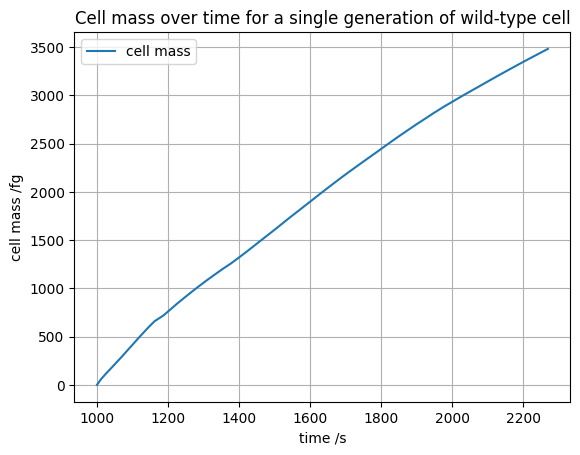

In [65]:
plt.figure()
plt.plot(d, t, label='cell mass')
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')
plt.title('Cell mass over time for a single generation of wild-type cell')
plt.legend()
plt.grid(True)
plt.savefig("singlewild.pdf", format='pdf', bbox_inches='tight')

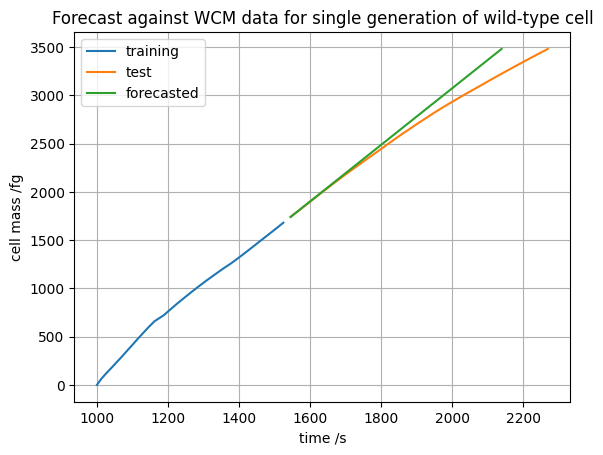

In [66]:
plt.figure()
plt.plot(d[:train_size],t[:train_size],label='training')
plt.plot(d[train_size:],t[train_size:],label='test')
plt.plot(forecast,t[train_size:],label='forecasted')

plt.xlabel('time /s')
plt.ylabel('cell mass /fg')
plt.title('Forecast against WCM data for single generation of wild-type cell')
plt.legend()
plt.grid(True)
plt.savefig("ARIMAsinglewild.pdf", format="pdf", bbox_inches="tight")


Here we move on to ARIMA for six generations of a single cell

first, make a df with the required data

In [67]:
data = df[['cellMass','time','generation']]
# data = data.head(6)
data['generation'] = data['generation'].apply(lambda x: int(x.split('_')[-1]))
# data = data.sort_values(by='generation')
print(data)

DataExp = data.explode('cellMass')
Datat = data.explode('time')
DataExp['time'] = Datat['time']

# print(DataExp['cellMass'])

                                            cellMass   
3  [909.9066407770748, 919.1179728664862, 931.612...  \
2  [1060.8049570383705, 1073.7206238764452, 1087....   
5  [997.4564900304971, 1005.05528889798, 1016.931...   
0  [925.7100806341166, 932.4482656883563, 940.957...   
4  [966.424059024977, 976.1402452492276, 988.9595...   
1  [1058.5326662986288, 1069.7255330778635, 1080....   

                                                time  generation  
3  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...           0  
2  [3936.0, 3996.0, 4056.0, 4116.0, 4176.0, 4236....           1  
5  [7153.0, 7213.0, 7273.0, 7333.0, 7393.0, 7453....           2  
0  [10639.0, 10699.0, 10759.0, 10819.0, 10879.0, ...           3  
4  [14588.0, 14648.0, 14708.0, 14768.0, 14828.0, ...           4  
1  [18250.0, 18310.0, 18370.0, 18430.0, 18490.0, ...           5  


train the model as before iterating over the generations

In [68]:
gens = DataExp['generation'].unique()
predictions = []
actual = []
trimes = []
teimes = []
for gen in gens:
    dfGen = DataExp[DataExp['generation']==gen]
    trainLen = round(0.5*len(dfGen))
    traindf = dfGen.iloc[:trainLen]
    testdf = dfGen.iloc[trainLen:]

    model = auto_arima(traindf['cellMass'],seasonal=False)#, trace=True)
    forecast = [model.predict(len(dfGen)-trainLen)]
    predictions.append(forecast)
    actual.append([dfGen['cellMass']])
    trimes.append([dfGen['time']])
    teimes.append([testdf['time']])

print(actual)

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an int

[[3     909.906641
3     919.117973
3     931.612377
3     944.035918
3     956.311754
        ...     
3    2000.589045
3    2026.289092
3    2052.849058
3    2079.390896
3    2106.059162
Name: cellMass, Length: 66, dtype: object], [2    1060.804957
2    1073.720624
2    1087.096093
2    1100.405264
2    1113.894177
2    1127.305172
2    1140.849695
2    1155.006738
2    1168.820664
2    1182.683423
2    1196.048522
2    1209.844584
2    1224.535656
2    1239.356449
2    1254.291206
2    1269.234731
2    1284.296206
2     1298.93636
2    1312.939271
2     1366.29765
2    1381.033981
2    1395.713352
2    1410.361877
2    1425.282559
2     1440.62999
2    1456.167914
2    1471.919725
2    1488.175243
2    1504.456825
2    1521.030727
2    1537.207237
2    1553.100239
2    1570.102773
2    1586.640396
2    1603.936828
2    1620.608963
2    1637.188641
2    1654.286642
2    1671.729249
2    1689.563404
2    1707.712519
2    1725.733856
2    1744.052577
2    1762.401402
2    1781.663017
2

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


plot each component on the same figure

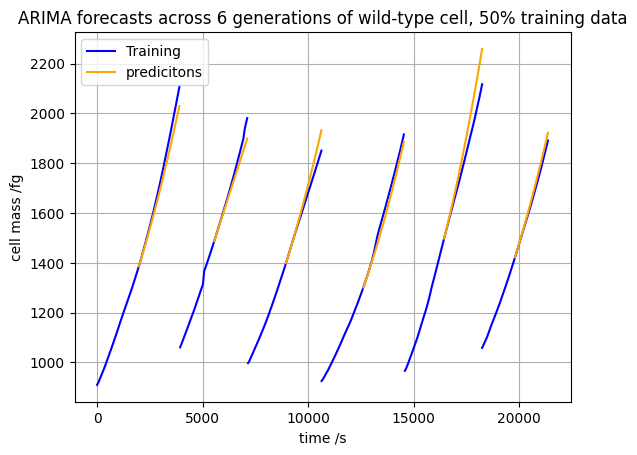

In [69]:
plt.figure()
i = 0
for act, trme in zip(actual,trimes):
    for a, t in zip(act,trme):
        if i==0:
            plt.plot(t,a,label='Training',color='blue')
        else:
            plt.plot(t,a,color='blue')
        i+=1
i = 0
for pred, teme in zip(predictions, teimes):
    for p,te in zip(pred, teme):
        if i==0:
            plt.plot(te,p,label='predicitons',color='orange')
        else:
            plt.plot(te,p,color='orange')
        i+=1
plt.legend()
plt.grid(True)


plt.title('ARIMA forecasts across 6 generations of wild-type cell, 50% training data')
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')

plt.savefig("arima6genwild50.pdf", format='pdf', bbox_inches='tight')

also trialling ARIMA on multiple generations as a single time series

In [91]:
y = DataExp['cellMass']
trainLen = round(0.7*len(y))
trainY = y[:trainLen]
testY = y[trainLen:]
traindf = DataExp.iloc[:trainLen]
testdf = DataExp.iloc[trainLen:]

seasons = data['generation'].nunique()-1

model = auto_arima(trainY, seasonal=True, m=seasons)


print(f"Summary for gene_ko '{'glmU'}':")
print(model.summary())

Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1569.126
Date:                Sat, 20 Apr 2024   AIC                           3144.252
Time:                        21:18:23   BIC                           3154.840
Sample:                             0   HQIC                          3148.512
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    122.2095     73.800      1.656      0.098     -22.435     266.854
ar.L1          0.9110      0.055     16.680      0.000       0.804       1.018
sigma2       1.48e+04   

In [92]:
forecast = model.predict(n_periods=len(testY))


c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [93]:
mse = mean_squared_error(testY, forecast)
mae = mean_absolute_error(testY, forecast)
mape = mean_absolute_percentage_error(testY, forecast)

mse, mae, mape


(95265.60686896693, 241.18956764776414, 0.14798210565919115)

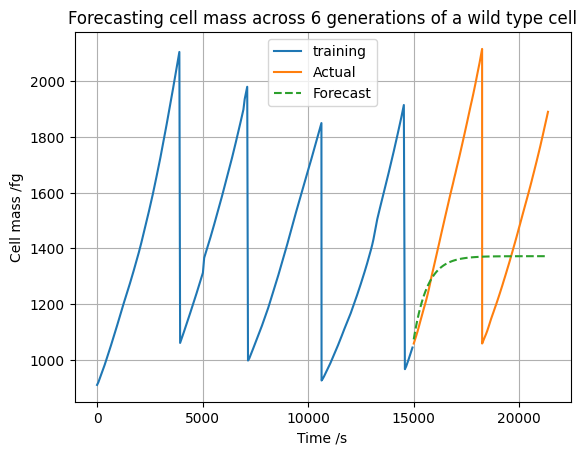

In [81]:

plt.plot(traindf['time'], trainY, label='training')
plt.plot(testdf['time'],testY,label='Actual')
plt.plot(testdf['time'], forecast, label="Forecast", linestyle='--')

plt.title("Forecasting cell mass across 6 generations of a wild type cell")
plt.xlabel("Time /s")
plt.ylabel("Cell mass /fg")
plt.legend()
plt.grid(True)
plt.savefig("sarimax.pdf", format='pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Cell mass against time for all generations of gene ko')

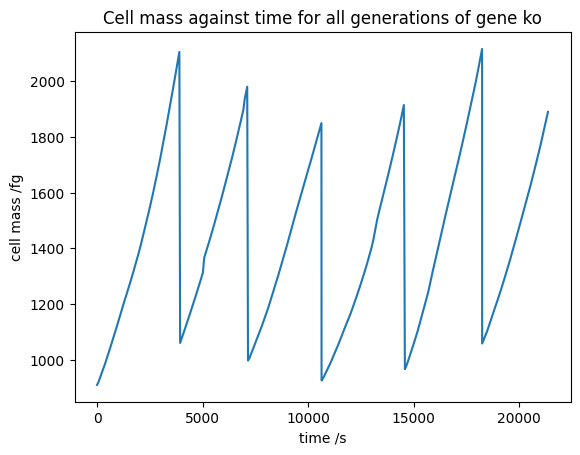

In [22]:
lsd = DataExp.drop(columns='generation')

plt.figure()
plt.plot(lsd['time'], lsd['cellMass'])
plt.xlabel("time /s")
plt.ylabel("cell mass /fg")
plt.title("Cell mass against time for all generations of wild type cell")


below is an early attempt at using LSTM, following a different tutorial I found online, not massively useful.

In [27]:
cellMass = lsd['cellMass'].values
cellMass = cellMass.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(cellMass))

cM_train = cellMass[:split]
cM_test = cellMass[split:]
cM_train = np.array(cM_train, dtype=np.float32)
cM_test = np.array(cM_test, dtype=np.float32)

time_train = lsd['time'][:split]
time_test = lsd['time'][split:]

print(len(cM_train))
print(len(cM_test))

288
72


In [28]:
look_back = 15

trainGenerator = TimeseriesGenerator(cM_train, cM_train, length=look_back, batch_size=20)
testGenerator = TimeseriesGenerator(cM_test, cM_test, length=look_back, batch_size=1)


In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
    activation='linear',
    input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit(trainGenerator, epochs=num_epochs, verbose=1)

Epoch 1/25
14/14 [==============================] - 1s 5ms/step - loss: 5486020.0000
Epoch 2/25
14/14 [==============================] - 0s 5ms/step - loss: 7238977.5000
Epoch 3/25
14/14 [==============================] - 0s 5ms/step - loss: 1992201.8750
Epoch 4/25
14/14 [==============================] - 0s 4ms/step - loss: 1697987.6250
Epoch 5/25
14/14 [==============================] - 0s 4ms/step - loss: 1766624.7500
Epoch 6/25
14/14 [==============================] - 0s 4ms/step - loss: 3474719.7500
Epoch 7/25
14/14 [==============================] - 0s 4ms/step - loss: 4137045.2500
Epoch 8/25
14/14 [==============================] - 0s 4ms/step - loss: 1881810.1250
Epoch 9/25
14/14 [==============================] - 0s 5ms/step - loss: 1518695.5000
Epoch 10/25
14/14 [==============================] - 0s 4ms/step - loss: 1886109.5000
Epoch 11/25
14/14 [==============================] - 0s 4ms/step - loss: 3512421.7500
Epoch 12/25
14/14 [==============================] - 0s 4ms/ste

In [33]:
prediction = model.predict_generator(testGenerator)

cM_train = cM_train.reshape((-1))
cM_test = cM_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = time_train,
    y = cM_train,
    mode='lines',
    name='Data'
)

trace2 = go.Scatter(
    x = time_test,
    y = cM_test,
    mode='lines',
    name='Actual'
)

trace3 = go.Scatter(
    x = time_test,
    y = prediction,
    mode='lines',
    name='Prediction'
)

layout = go.Layout(
    title = "cell mass",
    xaxis = {'title' : "Time /s"},
    yaxis = {'title' : "Cell mass /fg"}
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

C:\Users\gavla\AppData\Local\Temp\ipykernel_4900\2572911319.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [103]:
thisdf = df[['cellMass', 'time', 'generation']]
print(thisdf.shape)
timedf = thisdf.dropna(how='all')
print(timedf.shape)
i = 0
cellLabel = []
gens = []
for _,row in timedf.iterrows():
    if row['generation'] in gens:
        i+=1
        gens = []
    cellLabel.append(i)
    gens.append(row['generation'])

timedf['cellLabel'] = cellLabel
    

(550, 3)
(550, 3)


In [105]:
timedf = timedf.sort_values(by=['cellLabel', 'generation'])
cells = timedf['cellLabel'].unique()

In [107]:
maes = []
mses = []
mapes = []

for cell in cells:
    cellData = timedf[timedf['cellLabel']==cell]
    cellDataExp = cellData.explode('cellMass')
    cellt = cellData.explode('time')
    cellDataExp['time'] = cellt['time']
    y = cellDataExp['cellMass']
    trainLen = round(0.7*len(y))
    trainY = y[:trainLen]
    testY = y[trainLen:]
    traindf = cellDataExp.iloc[:trainLen]
    testdf = cellDataExp.iloc[trainLen:]

    seasons = traindf['generation'].nunique()

    model = auto_arima(trainY, seasonal=True, m=seasons)

    forecast = model.predict(n_periods=len(testY))

    print(f"Summary for gene_ko '{'glmU'}':")
    print(model.summary())

    mse = mean_squared_error(testY, forecast)
    mae = mean_absolute_error(testY, forecast)
    mape = mean_absolute_percentage_error(testY, forecast)

    mses.append(mse)
    maes.append(mae)
    mapes.append(mape)

metricsDict2 = {"Mean absolute error":maes, "Mean squared error":mses, "Mean absolute percentage error":mapes}
metricsFrame2 = pd.DataFrame(metricsDict2)


c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1569.126
Date:                Sun, 21 Apr 2024   AIC                           3144.252
Time:                        13:00:10   BIC                           3154.840
Sample:                             0   HQIC                          3148.512
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    122.2095     73.800      1.656      0.098     -22.435     266.854
ar.L1          0.9110      0.055     16.680      0.000       0.804       1.018
sigma2       1.48e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1402.985
Date:                Sun, 21 Apr 2024   AIC                           2811.969
Time:                        13:00:14   BIC                           2822.123
Sample:                             0   HQIC                          2816.070
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    159.7350     88.230      1.810      0.070     -13.192     332.662
ar.L1          0.8981      0.058     15.564      0.000       0.785       1.011
sigma2       2.24e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  221
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1415.118
Date:                Sun, 21 Apr 2024   AIC                           2836.236
Time:                        13:00:17   BIC                           2846.431
Sample:                             0   HQIC                          2840.352
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    172.1025    125.818      1.368      0.171     -74.496     418.701
ar.L1          0.8901      0.077     11.618      0.000       0.740       1.040
sigma2      2.112e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1332.159
Date:                Sun, 21 Apr 2024   AIC                           2670.317
Time:                        13:00:21   BIC                           2680.286
Sample:                             0   HQIC                          2674.350
                                - 205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    179.9373    104.078      1.729      0.084     -24.052     383.927
ar.L1          0.8897      0.063     14.114      0.000       0.766       1.013
sigma2      2.544e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1436.642
Date:                Sun, 21 Apr 2024   AIC                           2879.284
Time:                        13:00:24   BIC                           2889.546
Sample:                             0   HQIC                          2883.425
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.4713    116.500      1.352      0.176     -70.864     385.807
ar.L1          0.8960      0.073     12.300      0.000       0.753       1.039
sigma2      1.926e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1370.263
Date:                Sun, 21 Apr 2024   AIC                           2746.527
Time:                        13:00:28   BIC                           2756.625
Sample:                             0   HQIC                          2750.607
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    166.2151    122.590      1.356      0.175     -74.058     406.488
ar.L1          0.8931      0.069     12.872      0.000       0.757       1.029
sigma2       2.12e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1399.490
Date:                Sun, 21 Apr 2024   AIC                           2804.979
Time:                        13:00:31   BIC                           2815.160
Sample:                             0   HQIC                          2809.091
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    145.4222    133.927      1.086      0.278    -117.070     407.914
ar.L1          0.9039      0.075     11.978      0.000       0.756       1.052
sigma2      1.954e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1457.975
Date:                Sun, 21 Apr 2024   AIC                           2921.949
Time:                        13:00:35   BIC                           2932.264
Sample:                             0   HQIC                          2926.110
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    152.9523    103.427      1.479      0.139     -49.761     355.665
ar.L1          0.8978      0.067     13.437      0.000       0.767       1.029
sigma2      1.856e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1421.402
Date:                Sun, 21 Apr 2024   AIC                           2848.804
Time:                        13:00:38   BIC                           2859.039
Sample:                             0   HQIC                          2852.935
                                - 224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    151.5488    120.259      1.260      0.208     -84.155     387.253
ar.L1          0.8986      0.072     12.413      0.000       0.757       1.041
sigma2      1.889e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  247
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1538.747
Date:                Sun, 21 Apr 2024   AIC                           3083.495
Time:                        13:00:41   BIC                           3094.023
Sample:                             0   HQIC                          3087.733
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    123.6046    121.736      1.015      0.310    -114.993     362.202
ar.L1          0.9116      0.075     12.177      0.000       0.765       1.058
sigma2      1.501e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  234
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1469.406
Date:                Sun, 21 Apr 2024   AIC                           2944.813
Time:                        13:00:44   BIC                           2955.179
Sample:                             0   HQIC                          2948.992
                                - 234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    141.1054    114.685      1.230      0.219     -83.673     365.883
ar.L1          0.9019      0.073     12.357      0.000       0.759       1.045
sigma2      1.654e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  213
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1369.324
Date:                Sun, 21 Apr 2024   AIC                           2740.648
Time:                        13:00:47   BIC                           2744.005
Sample:                             0   HQIC                          2742.005
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.387e+04    459.791     51.910      0.000     2.3e+04    2.48e+04
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             22969.56
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1460.580
Date:                Sun, 21 Apr 2024   AIC                           2927.160
Time:                        13:00:50   BIC                           2937.474
Sample:                             0   HQIC                          2931.320
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.4603    116.327      1.285      0.199     -78.537     377.458
ar.L1          0.9008      0.070     12.807      0.000       0.763       1.039
sigma2      1.906e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  215
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1378.466
Date:                Sun, 21 Apr 2024   AIC                           2762.931
Time:                        13:00:53   BIC                           2773.043
Sample:                             0   HQIC                          2767.017
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    172.2722    119.831      1.438      0.151     -62.593     407.137
ar.L1          0.8892      0.073     12.113      0.000       0.745       1.033
sigma2      2.146e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1379.722
Date:                Sun, 21 Apr 2024   AIC                           2765.445
Time:                        13:00:56   BIC                           2775.571
Sample:                             0   HQIC                          2769.536
                                - 216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    166.5475    153.664      1.084      0.278    -134.629     467.724
ar.L1          0.8919      0.090      9.895      0.000       0.715       1.069
sigma2      2.054e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1372.790
Date:                Sun, 21 Apr 2024   AIC                           2747.579
Time:                        13:00:58   BIC                           2750.977
Sample:                             0   HQIC                          2748.951
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.455e+04    234.245     62.128      0.000    1.41e+04     1.5e+04
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             47175.51
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  219
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1408.661
Date:                Sun, 21 Apr 2024   AIC                           2823.321
Time:                        13:01:00   BIC                           2833.488
Sample:                             0   HQIC                          2827.427
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    169.6991    107.427      1.580      0.114     -40.854     380.253
ar.L1          0.8923      0.065     13.794      0.000       0.765       1.019
sigma2      2.237e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1558.202
Date:                Sun, 21 Apr 2024   AIC                           3122.404
Time:                        13:01:04   BIC                           3132.956
Sample:                             0   HQIC                          3126.651
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    118.3695     77.581      1.526      0.127     -33.686     270.425
ar.L1          0.9162      0.051     18.023      0.000       0.817       1.016
sigma2      1.583e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1576.908
Date:                Sun, 21 Apr 2024   AIC                           3155.817
Time:                        13:01:05   BIC                           3159.342
Sample:                             0   HQIC                          3157.235
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.677e+04    269.478     62.218      0.000    1.62e+04    1.73e+04
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             40069.72
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1527.855
Date:                Sun, 21 Apr 2024   AIC                           3061.710
Time:                        13:01:08   BIC                           3072.214
Sample:                             0   HQIC                          3065.940
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    130.4661    127.462      1.024      0.306    -119.355     380.287
ar.L1          0.9072      0.079     11.497      0.000       0.752       1.062
sigma2       1.52e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1450.441
Date:                Sun, 21 Apr 2024   AIC                           2906.881
Time:                        13:01:11   BIC                           2917.169
Sample:                             0   HQIC                          2911.032
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    150.5289     86.029      1.750      0.080     -18.085     319.143
ar.L1          0.8994      0.056     16.012      0.000       0.789       1.009
sigma2      1.939e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1421.326
Date:                Sun, 21 Apr 2024   AIC                           2848.652
Time:                        13:01:14   BIC                           2858.860
Sample:                             0   HQIC                          2852.773
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    155.8913     92.693      1.682      0.093     -25.784     337.567
ar.L1          0.8994      0.057     15.751      0.000       0.787       1.011
sigma2      2.107e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1454.779
Date:                Sun, 21 Apr 2024   AIC                           2915.558
Time:                        13:01:17   BIC                           2925.873
Sample:                             0   HQIC                          2919.719
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.1242     96.337      1.548      0.122     -39.693     337.942
ar.L1          0.8986      0.064     14.048      0.000       0.773       1.024
sigma2      1.804e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  234
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1471.193
Date:                Sun, 21 Apr 2024   AIC                           2944.385
Time:                        13:01:20   BIC                           2947.836
Sample:                             0   HQIC                          2945.777
                                - 234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.786e+04    312.888     57.085      0.000    1.72e+04    1.85e+04
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             30372.98
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  215
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1383.757
Date:                Sun, 21 Apr 2024   AIC                           2773.514
Time:                        13:01:23   BIC                           2783.626
Sample:                             0   HQIC                          2777.600
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    177.2185    131.553      1.347      0.178     -80.621     435.058
ar.L1          0.8880      0.079     11.268      0.000       0.734       1.042
sigma2      2.254e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1414.888
Date:                Sun, 21 Apr 2024   AIC                           2835.775
Time:                        13:01:25   BIC                           2845.997
Sample:                             0   HQIC                          2839.901
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.0887    154.985      1.014      0.311    -146.676     460.853
ar.L1          0.8950      0.093      9.600      0.000       0.712       1.078
sigma2      1.886e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  246
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1530.166
Date:                Sun, 21 Apr 2024   AIC                           3062.333
Time:                        13:01:28   BIC                           3065.834
Sample:                             0   HQIC                          3063.743
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.557e+04    257.210     60.545      0.000    1.51e+04    1.61e+04
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             36408.84
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1429.394
Date:                Sun, 21 Apr 2024   AIC                           2864.789
Time:                        13:01:31   BIC                           2875.050
Sample:                             0   HQIC                          2868.930
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    154.1503    124.152      1.242      0.214     -89.183     397.484
ar.L1          0.8954      0.077     11.605      0.000       0.744       1.047
sigma2       1.81e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1521.647
Date:                Sun, 21 Apr 2024   AIC                           3049.293
Time:                        13:01:34   BIC                           3059.785
Sample:                             0   HQIC                          3053.519
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    129.0724    112.158      1.151      0.250     -90.753     348.898
ar.L1          0.9080      0.073     12.385      0.000       0.764       1.052
sigma2      1.518e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  260
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1628.989
Date:                Sun, 21 Apr 2024   AIC                           3259.978
Time:                        13:01:37   BIC                           3263.534
Sample:                             0   HQIC                          3261.408
                                - 260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        1.7e+04    263.860     64.442      0.000    1.65e+04    1.75e+04
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             44851.21
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1456.162
Date:                Sun, 21 Apr 2024   AIC                           2918.324
Time:                        13:01:40   BIC                           2928.638
Sample:                             0   HQIC                          2922.484
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    143.9877    119.498      1.205      0.228     -90.224     378.200
ar.L1          0.9023      0.071     12.747      0.000       0.764       1.041
sigma2      1.837e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1434.471
Date:                Sun, 21 Apr 2024   AIC                           2874.942
Time:                        13:01:43   BIC                           2885.191
Sample:                             0   HQIC                          2879.079
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    169.2835    135.258      1.252      0.211     -95.817     434.384
ar.L1          0.8906      0.082     10.916      0.000       0.731       1.051
sigma2          2e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1305.838
Date:                Sun, 21 Apr 2024   AIC                           2617.677
Time:                        13:01:46   BIC                           2627.587
Sample:                             0   HQIC                          2621.687
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    191.1871    126.527      1.511      0.131     -56.802     439.176
ar.L1          0.8831      0.074     11.858      0.000       0.737       1.029
sigma2       2.54e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1523.917
Date:                Sun, 21 Apr 2024   AIC                           3053.833
Time:                        13:01:49   BIC                           3064.337
Sample:                             0   HQIC                          3058.063
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    115.9401    101.660      1.140      0.254     -83.310     315.190
ar.L1          0.9164      0.061     14.916      0.000       0.796       1.037
sigma2      1.468e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1444.982
Date:                Sun, 21 Apr 2024   AIC                           2891.963
Time:                        13:01:52   BIC                           2895.393
Sample:                             0   HQIC                          2893.347
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.872e+04    332.803     56.252      0.000    1.81e+04    1.94e+04
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             29270.22
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1549.638
Date:                Sun, 21 Apr 2024   AIC                           3105.275
Time:                        13:01:55   BIC                           3115.840
Sample:                             0   HQIC                          3109.527
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    121.7216     94.970      1.282      0.200     -64.417     307.860
ar.L1          0.9107      0.062     14.592      0.000       0.788       1.033
sigma2      1.409e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1369.084
Date:                Sun, 21 Apr 2024   AIC                           2740.168
Time:                        13:01:58   BIC                           2743.557
Sample:                             0   HQIC                          2741.537
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.576e+04    258.207     61.033      0.000    1.53e+04    1.63e+04
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             44704.52
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  190
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1252.510
Date:                Sun, 21 Apr 2024   AIC                           2511.020
Time:                        13:02:01   BIC                           2520.761
Sample:                             0   HQIC                          2514.966
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    225.0716    144.734      1.555      0.120     -58.603     508.746
ar.L1          0.8719      0.076     11.515      0.000       0.723       1.020
sigma2      3.081e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1326.412
Date:                Sun, 21 Apr 2024   AIC                           2658.824
Time:                        13:02:04   BIC                           2668.779
Sample:                             0   HQIC                          2662.851
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    196.4620    137.550      1.428      0.153     -73.131     466.054
ar.L1          0.8810      0.080     11.060      0.000       0.725       1.037
sigma2      2.569e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1422.842
Date:                Sun, 21 Apr 2024   AIC                           2851.683
Time:                        13:02:07   BIC                           2861.918
Sample:                             0   HQIC                          2855.815
                                - 224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    123.5157     79.085      1.562      0.118     -31.488     278.520
ar.L1          0.9166      0.044     20.663      0.000       0.830       1.004
sigma2      1.917e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1444.110
Date:                Sun, 21 Apr 2024   AIC                           2894.219
Time:                        13:02:10   BIC                           2904.507
Sample:                             0   HQIC                          2898.370
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    151.9837    116.142      1.309      0.191     -75.650     379.618
ar.L1          0.8981      0.070     12.859      0.000       0.761       1.035
sigma2      1.845e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1453.834
Date:                Sun, 21 Apr 2024   AIC                           2913.669
Time:                        13:02:13   BIC                           2923.983
Sample:                             0   HQIC                          2917.830
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    145.3846    104.417      1.392      0.164     -59.269     350.038
ar.L1          0.9010      0.068     13.329      0.000       0.769       1.034
sigma2      1.793e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1528.289
Date:                Sun, 21 Apr 2024   AIC                           3058.578
Time:                        13:02:15   BIC                           3062.067
Sample:                             0   HQIC                          3059.984
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.79e+04    299.087     59.852      0.000    1.73e+04    1.85e+04
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             35517.71
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1421.747
Date:                Sun, 21 Apr 2024   AIC                           2849.493
Time:                        13:02:18   BIC                           2859.715
Sample:                             0   HQIC                          2853.620
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    154.9175    126.492      1.225      0.221     -93.002     402.837
ar.L1          0.8983      0.077     11.647      0.000       0.747       1.049
sigma2      2.002e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  238
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1506.286
Date:                Sun, 21 Apr 2024   AIC                           3018.572
Time:                        13:02:21   BIC                           3028.989
Sample:                             0   HQIC                          3022.771
                                - 238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    136.4496     74.170      1.840      0.066      -8.921     281.820
ar.L1          0.9071      0.051     17.773      0.000       0.807       1.007
sigma2      1.814e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1439.600
Date:                Sun, 21 Apr 2024   AIC                           2885.201
Time:                        13:02:24   BIC                           2895.462
Sample:                             0   HQIC                          2889.342
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    156.7537     95.091      1.648      0.099     -29.622     343.129
ar.L1          0.8960      0.063     14.225      0.000       0.773       1.019
sigma2      1.969e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1570.405
Date:                Sun, 21 Apr 2024   AIC                           3146.810
Time:                        13:02:27   BIC                           3157.422
Sample:                             0   HQIC                          3151.079
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    126.8461    105.713      1.200      0.230     -80.348     334.040
ar.L1          0.9059      0.073     12.443      0.000       0.763       1.049
sigma2      1.362e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1424.235
Date:                Sun, 21 Apr 2024   AIC                           2854.470
Time:                        13:02:30   BIC                           2864.691
Sample:                             0   HQIC                          2858.596
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    160.1542    112.424      1.425      0.154     -60.194     380.502
ar.L1          0.8959      0.070     12.823      0.000       0.759       1.033
sigma2      2.043e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  232
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1477.378
Date:                Sun, 21 Apr 2024   AIC                           2960.755
Time:                        13:02:34   BIC                           2971.096
Sample:                             0   HQIC                          2964.925
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    140.6801     77.877      1.806      0.071     -11.956     293.316
ar.L1          0.9054      0.053     16.951      0.000       0.801       1.010
sigma2      1.959e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1404.211
Date:                Sun, 21 Apr 2024   AIC                           2814.421
Time:                        13:02:37   BIC                           2824.602
Sample:                             0   HQIC                          2818.532
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    164.7112    118.771      1.387      0.166     -68.076     397.499
ar.L1          0.8924      0.073     12.247      0.000       0.750       1.035
sigma2      2.028e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  215
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1327.480
Date:                Sun, 21 Apr 2024   AIC                           2660.961
Time:                        13:02:40   BIC                           2671.073
Sample:                             0   HQIC                          2665.047
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    114.5485     69.505      1.648      0.099     -21.680     250.777
ar.L1          0.9159      0.052     17.569      0.000       0.814       1.018
sigma2      1.329e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -907.786
Date:                Sun, 21 Apr 2024   AIC                           1817.572
Time:                        13:02:43   BIC                           1820.534
Sample:                             0   HQIC                          1818.776
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.912e+04    391.672     48.813      0.000    1.84e+04    1.99e+04
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             28028.44
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1138.239
Date:                Sun, 21 Apr 2024   AIC                           2282.477
Time:                        13:02:46   BIC                           2292.039
Sample:                             0   HQIC                          2286.354
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    174.6670    121.858      1.433      0.152     -64.170     413.504
ar.L1          0.8875      0.075     11.765      0.000       0.740       1.035
sigma2      1.926e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  172
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1112.776
Date:                Sun, 21 Apr 2024   AIC                           2231.553
Time:                        13:02:48   BIC                           2240.995
Sample:                             0   HQIC                          2235.384
                                - 172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    182.2471    107.301      1.698      0.089     -28.058     392.553
ar.L1          0.8893      0.066     13.570      0.000       0.761       1.018
sigma2       2.39e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -902.617
Date:                Sun, 21 Apr 2024   AIC                           1811.234
Time:                        13:02:51   BIC                           1820.143
Sample:                             0   HQIC                          1814.854
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.6554    127.236      1.239      0.215     -91.722     407.032
ar.L1          0.8991      0.083     10.787      0.000       0.736       1.062
sigma2      1.593e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  176
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1113.104
Date:                Sun, 21 Apr 2024   AIC                           2232.207
Time:                        13:02:54   BIC                           2241.719
Sample:                             0   HQIC                          2236.065
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    167.3636    160.822      1.041      0.298    -147.841     482.569
ar.L1          0.8900      0.094      9.477      0.000       0.706       1.074
sigma2       1.81e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  181
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1147.698
Date:                Sun, 21 Apr 2024   AIC                           2301.397
Time:                        13:02:57   BIC                           2310.992
Sample:                             0   HQIC                          2305.287
                                - 181                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    164.0506    181.951      0.902      0.367    -192.568     520.669
ar.L1          0.8951      0.103      8.705      0.000       0.694       1.097
sigma2      1.872e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1187.922
Date:                Sun, 21 Apr 2024   AIC                           2381.843
Time:                        13:03:00   BIC                           2391.553
Sample:                             0   HQIC                          2385.777
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.3047    109.202      1.440      0.150     -56.727     371.337
ar.L1          0.8962      0.071     12.573      0.000       0.756       1.036
sigma2      1.775e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1181.477
Date:                Sun, 21 Apr 2024   AIC                           2368.955
Time:                        13:03:03   BIC                           2378.664
Sample:                             0   HQIC                          2372.889
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    147.1136    110.695      1.329      0.184     -69.845     364.072
ar.L1          0.9009      0.068     13.335      0.000       0.769       1.033
sigma2      1.669e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1249.251
Date:                Sun, 21 Apr 2024   AIC                           2504.501
Time:                        13:03:06   BIC                           2514.426
Sample:                             0   HQIC                          2508.517
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    118.5810    116.829      1.015      0.310    -110.399     347.561
ar.L1          0.9149      0.072     12.620      0.000       0.773       1.057
sigma2      1.369e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -985.045
Date:                Sun, 21 Apr 2024   AIC                           1976.089
Time:                        13:03:09   BIC                           1985.315
Sample:                             0   HQIC                          1979.835
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    136.6886    126.109      1.084      0.278    -110.480     383.857
ar.L1          0.9080      0.084     10.835      0.000       0.744       1.072
sigma2      1.283e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1141.342
Date:                Sun, 21 Apr 2024   AIC                           2288.683
Time:                        13:03:12   BIC                           2298.262
Sample:                             0   HQIC                          2292.567
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.4781    107.587      1.464      0.143     -53.389     368.345
ar.L1          0.8958      0.068     13.081      0.000       0.762       1.030
sigma2      1.858e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1460.580
Date:                Sun, 21 Apr 2024   AIC                           2927.160
Time:                        13:03:15   BIC                           2937.474
Sample:                             0   HQIC                          2931.320
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.4603    116.327      1.285      0.199     -78.537     377.458
ar.L1          0.9008      0.070     12.807      0.000       0.763       1.039
sigma2      1.906e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  215
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1378.466
Date:                Sun, 21 Apr 2024   AIC                           2762.931
Time:                        13:03:18   BIC                           2773.043
Sample:                             0   HQIC                          2767.017
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    172.2722    119.831      1.438      0.151     -62.593     407.137
ar.L1          0.8892      0.073     12.113      0.000       0.745       1.033
sigma2      2.146e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1143.667
Date:                Sun, 21 Apr 2024   AIC                           2293.333
Time:                        13:03:21   BIC                           2302.912
Sample:                             0   HQIC                          2297.217
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    171.7801    160.837      1.068      0.286    -143.455     487.015
ar.L1          0.8897      0.095      9.382      0.000       0.704       1.076
sigma2      1.915e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  190
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1190.647
Date:                Sun, 21 Apr 2024   AIC                           2387.295
Time:                        13:03:24   BIC                           2397.036
Sample:                             0   HQIC                          2391.241
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    139.6243    101.464      1.376      0.169     -59.242     338.491
ar.L1          0.9040      0.064     14.048      0.000       0.778       1.030
sigma2      1.608e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1148.313
Date:                Sun, 21 Apr 2024   AIC                           2302.626
Time:                        13:03:27   BIC                           2312.188
Sample:                             0   HQIC                          2306.503
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    176.6428    114.816      1.538      0.124     -48.392     401.678
ar.L1          0.8895      0.070     12.758      0.000       0.753       1.026
sigma2      2.152e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1272.173
Date:                Sun, 21 Apr 2024   AIC                           2550.345
Time:                        13:03:30   BIC                           2560.300
Sample:                             0   HQIC                          2554.372
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    121.9400     79.773      1.529      0.126     -34.413     278.293
ar.L1          0.9151      0.053     17.345      0.000       0.812       1.018
sigma2      1.511e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  153
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -957.997
Date:                Sun, 21 Apr 2024   AIC                           1921.995
Time:                        13:03:33   BIC                           1931.086
Sample:                             0   HQIC                          1925.688
                                - 153                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    119.8139    105.998      1.130      0.258     -87.938     327.566
ar.L1          0.9221      0.074     12.517      0.000       0.778       1.067
sigma2      1.588e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1242.287
Date:                Sun, 21 Apr 2024   AIC                           2490.574
Time:                        13:03:36   BIC                           2500.469
Sample:                             0   HQIC                          2494.579
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    138.0679    144.123      0.958      0.338    -144.407     420.543
ar.L1          0.9035      0.090     10.061      0.000       0.728       1.080
sigma2      1.444e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -948.291
Date:                Sun, 21 Apr 2024   AIC                           1902.581
Time:                        13:03:39   BIC                           1911.633
Sample:                             0   HQIC                          1906.258
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    142.7896     89.498      1.595      0.111     -32.623     318.202
ar.L1          0.9070      0.061     14.967      0.000       0.788       1.026
sigma2      1.655e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -889.326
Date:                Sun, 21 Apr 2024   AIC                           1784.652
Time:                        13:03:42   BIC                           1793.477
Sample:                             0   HQIC                          1788.238
                                - 140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    143.0448    123.902      1.155      0.248     -99.798     385.888
ar.L1          0.9119      0.079     11.490      0.000       0.756       1.067
sigma2      1.904e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  158
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -972.801
Date:                Sun, 21 Apr 2024   AIC                           1951.602
Time:                        13:03:45   BIC                           1960.790
Sample:                             0   HQIC                          1955.333
                                - 158                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    127.4413     88.966      1.432      0.152     -46.928     301.811
ar.L1          0.9126      0.063     14.493      0.000       0.789       1.036
sigma2      1.293e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  148
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -921.373
Date:                Sun, 21 Apr 2024   AIC                           1848.747
Time:                        13:03:48   BIC                           1857.738
Sample:                             0   HQIC                          1852.400
                                - 148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    141.4679    142.201      0.995      0.320    -137.241     420.177
ar.L1          0.9086      0.087     10.445      0.000       0.738       1.079
sigma2      1.478e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -887.569
Date:                Sun, 21 Apr 2024   AIC                           1781.138
Time:                        13:03:51   BIC                           1789.984
Sample:                             0   HQIC                          1784.733
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    160.0555    137.965      1.160      0.246    -110.351     430.462
ar.L1          0.8991      0.089     10.152      0.000       0.726       1.073
sigma2      1.682e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1414.888
Date:                Sun, 21 Apr 2024   AIC                           2835.775
Time:                        13:03:54   BIC                           2845.997
Sample:                             0   HQIC                          2839.901
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    157.0887    154.985      1.014      0.311    -146.676     460.853
ar.L1          0.8950      0.093      9.600      0.000       0.712       1.078
sigma2      1.886e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  159
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -978.832
Date:                Sun, 21 Apr 2024   AIC                           1963.665
Time:                        13:03:58   BIC                           1972.871
Sample:                             0   HQIC                          1967.403
                                - 159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    111.6508    103.624      1.077      0.281     -91.448     314.749
ar.L1          0.9248      0.062     14.898      0.000       0.803       1.046
sigma2      1.291e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1205.599
Date:                Sun, 21 Apr 2024   AIC                           2417.199
Time:                        13:04:00   BIC                           2426.971
Sample:                             0   HQIC                          2421.157
                                - 192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    155.3722    124.966      1.243      0.214     -89.556     400.301
ar.L1          0.8954      0.078     11.446      0.000       0.742       1.049
sigma2      1.648e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1267.108
Date:                Sun, 21 Apr 2024   AIC                           2540.216
Time:                        13:04:04   BIC                           2550.185
Sample:                             0   HQIC                          2544.248
                                - 205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    125.3315    103.491      1.211      0.226     -77.507     328.170
ar.L1          0.9104      0.068     13.300      0.000       0.776       1.045
sigma2      1.356e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  208
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1308.387
Date:                Sun, 21 Apr 2024   AIC                           2622.775
Time:                        13:04:07   BIC                           2632.787
Sample:                             0   HQIC                          2626.823
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    108.8257     64.781      1.680      0.093     -18.142     235.794
ar.L1          0.9255      0.046     20.215      0.000       0.836       1.015
sigma2      1.687e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1456.162
Date:                Sun, 21 Apr 2024   AIC                           2918.324
Time:                        13:04:10   BIC                           2928.638
Sample:                             0   HQIC                          2922.484
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    143.9877    119.498      1.205      0.228     -90.224     378.200
ar.L1          0.9023      0.071     12.747      0.000       0.764       1.041
sigma2      1.837e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1434.471
Date:                Sun, 21 Apr 2024   AIC                           2874.942
Time:                        13:04:14   BIC                           2885.191
Sample:                             0   HQIC                          2879.079
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    169.2835    135.258      1.252      0.211     -95.817     434.384
ar.L1          0.8906      0.082     10.916      0.000       0.731       1.051
sigma2          2e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1305.838
Date:                Sun, 21 Apr 2024   AIC                           2617.677
Time:                        13:04:24   BIC                           2627.587
Sample:                             0   HQIC                          2621.687
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    191.1871    126.527      1.511      0.131     -56.802     439.176
ar.L1          0.8831      0.074     11.858      0.000       0.737       1.029
sigma2       2.54e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1262.377
Date:                Sun, 21 Apr 2024   AIC                           2530.754
Time:                        13:04:27   BIC                           2540.708
Sample:                             0   HQIC                          2534.780
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    119.8343    111.713      1.073      0.283     -99.118     338.787
ar.L1          0.9153      0.067     13.630      0.000       0.784       1.047
sigma2      1.381e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  148
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -927.817
Date:                Sun, 21 Apr 2024   AIC                           1861.634
Time:                        13:04:30   BIC                           1870.626
Sample:                             0   HQIC                          1865.287
                                - 148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    148.5832    108.804      1.366      0.172     -64.669     361.836
ar.L1          0.9060      0.069     13.214      0.000       0.772       1.040
sigma2      1.602e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1018.337
Date:                Sun, 21 Apr 2024   AIC                           2042.674
Time:                        13:04:32   BIC                           2052.028
Sample:                             0   HQIC                          2046.471
                                - 167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    116.8173     98.034      1.192      0.233     -75.326     308.961
ar.L1          0.9182      0.067     13.678      0.000       0.787       1.050
sigma2      1.142e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1185.912
Date:                Sun, 21 Apr 2024   AIC                           2377.824
Time:                        13:04:35   BIC                           2387.533
Sample:                             0   HQIC                          2381.757
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    152.6244     90.117      1.694      0.090     -24.001     329.250
ar.L1          0.8966      0.061     14.633      0.000       0.777       1.017
sigma2      1.733e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -619.200
Date:                Sun, 21 Apr 2024   AIC                           1244.400
Time:                        13:04:37   BIC                           1252.030
Sample:                             0   HQIC                          1247.482
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    237.0669    184.241      1.287      0.198    -124.040     598.174
ar.L1          0.8613      0.099      8.671      0.000       0.667       1.056
sigma2      3.025e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1090.174
Date:                Sun, 21 Apr 2024   AIC                           2186.347
Time:                        13:04:39   BIC                           2195.737
Sample:                             0   HQIC                          2190.158
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    192.6152    132.140      1.458      0.145     -66.375     451.606
ar.L1          0.8822      0.078     11.331      0.000       0.730       1.035
sigma2      2.311e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -658.934
Date:                Sun, 21 Apr 2024   AIC                           1323.868
Time:                        13:04:42   BIC                           1331.801
Sample:                             0   HQIC                          1327.082
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    164.0047    190.679      0.860      0.390    -209.720     537.729
ar.L1          0.8917      0.113      7.895      0.000       0.670       1.113
sigma2      1.845e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1187.477
Date:                Sun, 21 Apr 2024   AIC                           2380.954
Time:                        13:04:44   BIC                           2390.664
Sample:                             0   HQIC                          2384.888
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    154.3506    121.772      1.268      0.205     -84.318     393.019
ar.L1          0.8973      0.073     12.217      0.000       0.753       1.041
sigma2      1.778e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1241.857
Date:                Sun, 21 Apr 2024   AIC                           2489.714
Time:                        13:04:47   BIC                           2499.579
Sample:                             0   HQIC                          2493.707
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    137.6225     99.748      1.380      0.168     -57.881     333.126
ar.L1          0.9059      0.065     13.923      0.000       0.778       1.033
sigma2      1.622e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  193
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1212.394
Date:                Sun, 21 Apr 2024   AIC                           2430.788
Time:                        13:04:49   BIC                           2440.576
Sample:                             0   HQIC                          2434.752
                                - 193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    148.5712     81.865      1.815      0.070     -11.882     309.024
ar.L1          0.9042      0.055     16.491      0.000       0.797       1.012
sigma2      1.643e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  154
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -953.286
Date:                Sun, 21 Apr 2024   AIC                           1912.572
Time:                        13:04:51   BIC                           1921.683
Sample:                             0   HQIC                          1916.273
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    122.7201    155.411      0.790      0.430    -181.879     427.319
ar.L1          0.9196      0.101      9.072      0.000       0.721       1.118
sigma2      1.371e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  154
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -964.851
Date:                Sun, 21 Apr 2024   AIC                           1935.703
Time:                        13:04:53   BIC                           1944.814
Sample:                             0   HQIC                          1939.404
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    107.9953     90.832      1.189      0.234     -70.032     286.023
ar.L1          0.9282      0.065     14.353      0.000       0.801       1.055
sigma2      1.599e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  159
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -991.682
Date:                Sun, 21 Apr 2024   AIC                           1989.364
Time:                        13:04:57   BIC                           1998.571
Sample:                             0   HQIC                          1993.103
                                - 159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    109.2965    102.385      1.068      0.286     -91.374     309.968
ar.L1          0.9289      0.071     13.021      0.000       0.789       1.069
sigma2      1.512e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1018.342
Date:                Sun, 21 Apr 2024   AIC                           2042.685
Time:                        13:04:59   BIC                           2052.074
Sample:                             0   HQIC                          2046.495
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    107.7632    118.759      0.907      0.364    -125.001     340.527
ar.L1          0.9188      0.087     10.600      0.000       0.749       1.089
sigma2      9897.4647   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -912.620
Date:                Sun, 21 Apr 2024   AIC                           1831.239
Time:                        13:05:02   BIC                           1840.169
Sample:                             0   HQIC                          1834.868
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    152.8937    118.155      1.294      0.196     -78.685     384.472
ar.L1          0.9042      0.077     11.765      0.000       0.754       1.055
sigma2        1.7e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1458.564
Date:                Sun, 21 Apr 2024   AIC                           2923.128
Time:                        13:05:06   BIC                           2933.429
Sample:                             0   HQIC                          2927.284
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    141.9026     79.090      1.794      0.073     -13.111     296.916
ar.L1          0.9051      0.055     16.599      0.000       0.798       1.012
sigma2      1.962e+04   

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [108]:
metricsFrame2.describe()


,Mean absolute error,Mean squared error,Mean absolute percentage error
count,100.000000,100.000000,100.000000
mean,278.818093,120430.341918,0.184782
std,66.189963,65809.497226,0.048322
min,160.915334,44076.355264,0.093956
25%,241.790423,83467.238183,0.155661
50%,264.749198,108737.424821,0.173166
75%,302.645734,128568.920226,0.192189
max,633.860931,508744.002337,0.424796
